<a href="https://colab.research.google.com/github/Salitre97/ECGR-4105-Intro-to-ML/blob/cristian/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Problem 1*** standard linear regression

In [89]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
file_path = '/content/drive/My Drive/ML-4105/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [91]:
housing.shape

(545, 13)

In [92]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NUll values in the dataset, hence it is clean

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [93]:
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

# Applying the function to the list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [94]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)


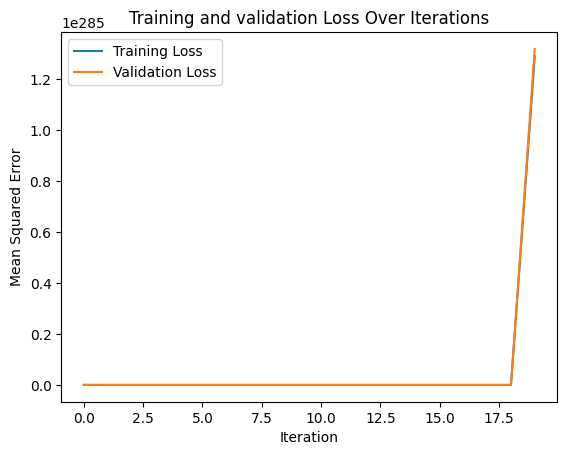

In [95]:
# Problem 1a

# Select data for input and exract data for training set
selected_input = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# extract the output
y_train = df_train['price'].values.reshape(-1, 1)

# extract the input needed
X_train = df_train[selected_input].values

# use test set as validation set
X_val = df_test[selected_input].values
y_val = df_test['price'].values.reshape(-1, 1)

# Train a simple linear regression model using gradient descent
learning_rate = 0.1
n_iterations = 20
m = len(X_train)

# inital values
theta = np.zeros((X_train.shape[1] + 1, 1))

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
  gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
  theta -= learning_rate * gradients

  train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
  val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

  train_losses.append(train_loss)
  val_losses.append(val_loss)

# Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and validation Loss Over Iterations")
plt.show()


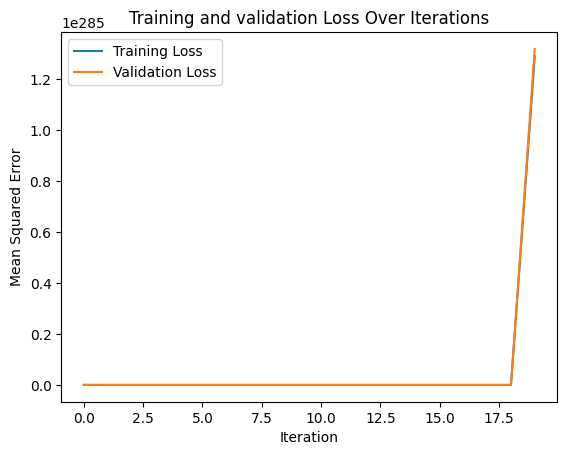

In [96]:
# Problem 1b

# new input dataset for training
selected_input_1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_train = df_train[selected_input_1].values
y_train = df_train['price'].values.reshape(-1, 1)

# Extract the validation (test) set
X_val = df_test[selected_input_1].values
y_val = df_test['price'].values.reshape(-1, 1)  # y_val also previously defined

# Train a simple linear regression model using gradient descent
learning_rate = 0.1
n_iterations = 20
m = len(X_train)

# inital values
theta = np.zeros((X_train.shape[1] + 1, 1))

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
  # gradient of the cost function with respect to theta
  gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
  # new theta value
  theta -= learning_rate * gradients

  # cost function
  train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
  val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

  train_losses.append(train_loss)
  val_losses.append(val_loss)

# Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and validation Loss Over Iterations")
plt.show()


# ***Problem 2*** implement normalization and standardization -- results show that standardizing the dataset provides the best fit.  The training and validation loss converge at similar rates and with lesser iterations compare to the normalizing the dataset

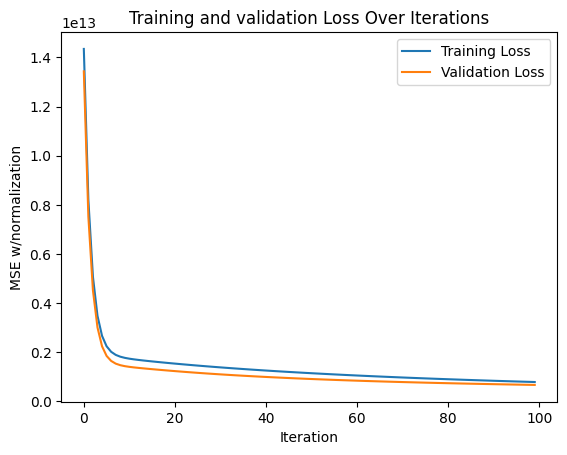

In [97]:
# For Problem 2

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_norm = MinMaxScaler()
scaler_std = StandardScaler()

# Problem 2a - normalization


# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

X_train = df_train[num_vars].values
X_val = df_test[num_vars].values

# fit and transform the training data (normalization)
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm = scaler_norm.fit_transform(X_val)

# Train a simple linear regression model using gradient descent
learning_rate = 0.1
n_iterations = 100
m = len(X_train_norm)

# initial values
theta = np.zeros((X_train_norm.shape[1] + 1, 1))

X_b_train_norm = np.c_[np.ones((len(X_train_norm), 1)), X_train_norm]
X_b_val_norm = np.c_[np.ones((len(X_val_norm), 1)), X_val_norm]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
  gradients = 2/m * X_b_train_norm.T.dot(X_b_train_norm.dot(theta) - y_train)
  theta -= learning_rate * gradients

  train_loss = (1/m) * np.sum(np.square(X_b_train_norm.dot(theta) - y_train))
  val_loss = (1/len(X_val_norm)) * np.sum(np.square(X_b_val_norm.dot(theta) - y_val))

  train_losses.append(train_loss)
  val_losses.append(val_loss)

# Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("MSE w/normalization")
plt.legend()
plt.title("Training and validation Loss Over Iterations")
plt.show()

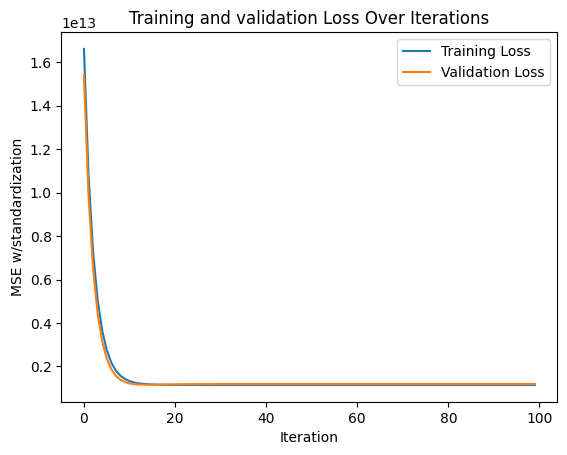

In [98]:
# Problem 2b - standardization

num_vars1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

X_train = df_train[num_vars1].values
X_val = df_test[num_vars1].values

# fit and transform the training data (standardization)
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.fit_transform(X_val)


# output data does not need to be normalized or standardized
y_train = df_train['price'].values.reshape(-1, 1)
y_val = df_test['price'].values.reshape(-1, 1)

learning_rate = 0.1
n_iterations = 100
m = len(X_train_std)

# initial values
theta = np.zeros((X_train_std.shape[1] + 1, 1))

X_b_train_std = np.c_[np.ones((len(X_train_std), 1)), X_train_std]
X_b_val_std = np.c_[np.ones((len(X_val_std), 1)), X_val_std]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
  gradients = 2/m * X_b_train_std.T.dot(X_b_train_std.dot(theta) - y_train)
  theta -= learning_rate * gradients

  train_loss = (1/m) * np.sum(np.square(X_b_train_std.dot(theta) - y_train))
  val_loss = (1/len(X_val_std)) * np.sum(np.square(X_b_val_std.dot(theta) - y_val))

  train_losses.append(train_loss)
  val_losses.append(val_loss)

# Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("MSE w/standardization")
plt.legend()
plt.title("Training and validation Loss Over Iterations")
plt.show()

In [99]:
# Problem 3a

# Problem 2a - normalization


# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

X_train = df_train[num_vars].values
X_val = df_test[num_vars].values

# fit and transform the training data (normalization)
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm = scaler_norm.fit_transform(X_val)

# Train a simple linear regression model using gradient descent
learning_rate = 0.1
n_iterations = 100
m = len(X_train_norm)

# initial values
theta = np.zeros((X_train_norm.shape[1] + 1, 1))
lamda = 0.1
reg_term = theta.copy()
reg_term[0] = 0

X_b_train_norm = np.c_[np.ones((len(X_train_norm), 1)), X_train_norm]
X_b_val_norm = np.c_[np.ones((len(X_val_norm), 1)), X_val_norm]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
  gradients = 2/m * X_b_train_norm.T.dot(X_b_train_norm.dot(theta) - y_train) + 2 * lamda * reg_term
  theta -= learning_rate * gradients

  train_loss = (1/m) * np.sum(np.square(X_b_train_norm.dot(theta) - y_train)) + (lambda * np.sum(np.square(theta[1:])))
  val_loss = (1/len(X_val_norm)) * np.sum(np.square(X_b_val_norm.dot(theta) - y_val))

  train_losses.append(train_loss)
  val_losses.append(val_loss)

# Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("MSE w/normalization")
plt.legend()
plt.title("Training and validation Loss Over Iterations")
plt.show()


SyntaxError: ignored